<a href="https://colab.research.google.com/github/rizkyarif12/PCVK_Ganjil_2024/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

##1. Buat Gamma Correction sesuai dengan petunjuk berikut:
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Masukkan nilai Gamma: 3


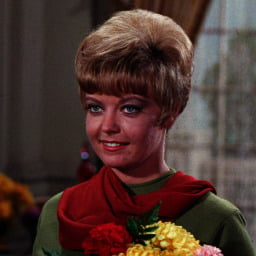

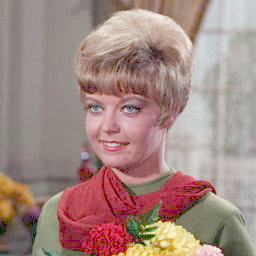

In [23]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

# Meminta input dari pengguna
gamma = input('Masukkan nilai Gamma: ')

# Memastikan input dapat dikonversi ke float
try:
    gamma = float(gamma)
except ValueError:
    print('Error, not a number. Silakan masukkan nilai yang valid.')
    exit()

# Membaca citra
image_path = '/content/drive/MyDrive/PCVK/female.jpg'  # Ganti dengan path citra Anda
image = cv.imread(image_path)

if image is None:
    print('Error: Image not found.')
else:
    corrected_image = gamma_correction(image, gamma)
    cv2_imshow(image)  # Menggunakan cv2_imshow untuk menampilkan gambar di Google Colab
    cv2_imshow(corrected_image)

## 2. Buat Simulasi Image Depth

Image loaded successfully with shape: (256, 256)


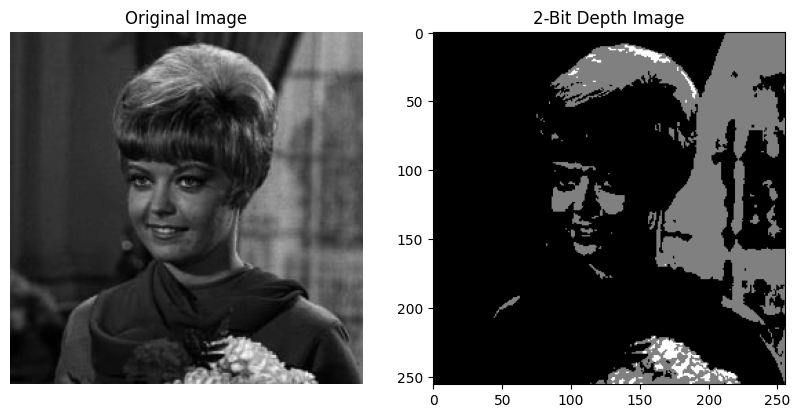

In [24]:
import matplotlib.pyplot as plt

# Parameters
bit_depth = 2
levels = pow(2, bit_depth)  # Number of gray levels
level = 255 // (levels - 1)

# Reading the original image in grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/female.jpg', cv.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if original is None:
    print("Error: Image not loaded correctly. Check the file path.")
else:
    print("Image loaded successfully with shape:", original.shape)

    # Create an empty image to store the depth-reduced image
    depth_image = np.zeros_like(original)

    # Calculate the depth-reduced image
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            depth_image[i, j] = (original[i, j] // level) * level
    # Plotting the original and the depth-reduced images side by side
    plt.figure(figsize=(10, 5))

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Display depth-reduced image
    plt.subplot(1, 2, 2)
    plt.imshow(depth_image, cmap='gray')
    plt.title('2-Bit Depth Image')
    plt.axis('on')

    plt.show()